In [1]:
import requests
import json
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np


In [2]:
# Define the base url to concatenate url strings
urlBase = "https://www.motogp.com"

In [3]:
# Returns JSON
def getCircuits(year):
    endpoint = urlBase + "/en/ajax/results/selector/" + str(year)
    req = requests.get(endpoint)
    return req.json()

# Returns HTML | This shows the final ranking
def getDriversTableYear(year):
    endpoint = urlBase + "/en/ajax/results/parse_final_standing/" + str(year)
    req = requests.get(endpoint)
    soup = BeautifulSoup(req.content, 'html.parser')
    return soup

# Returns HTML | This gets the final chart by race 
def getWinnersCircuit(circuit, year):
    url = urlBase + "/en/ajax/results/files/" + str(year) + "/" + circuit  + "/500cc/RAC"
    req = requests.get(url)

    return req

def getCategory(year):
    endpoint = urlBase + "en/ajax/results/selector/" + str(year) + "/VEN"
    return endpoint

# Create Dataframes with JSON Inputs
def dataToJson(data):
    return pd.DataFrame(data.json())


In [4]:
# Circuits Name Dataframe by year
df = np.transpose(pd.DataFrame(getCircuits(2000)))
df 

,shortname,title,circuit,sequence,url
1,RSA,SOUTH AFRICAN GRAND PRIX,Phakisa Freeway,1,/en/ajax/results/selector/2000/RSA
2,MAL,MALAYSIAN GRAND PRIX,Sepang International Circuit,2,/en/ajax/results/selector/2000/MAL
3,JPN,JAPANESE GRAND PRIX,Suzuka Circuit,3,/en/ajax/results/selector/2000/JPN
4,SPA,SPANISH GRAND PRIX,Circuito de Jerez - Angel Nieto,4,/en/ajax/results/selector/2000/SPA
5,FRA,FRENCH GRAND PRIX,Le Mans,5,/en/ajax/results/selector/2000/FRA
6,ITA,ITALIAN GRAND PRIX,Autodromo Internazionale del Mugello,6,/en/ajax/results/selector/2000/ITA
7,CAT,CATALUNYA GRAND PRIX,Circuit de Barcelona-Catalunya,7,/en/ajax/results/selector/2000/CAT
8,NED,DUTCH TT,TT Circuit Assen,8,/en/ajax/results/selector/2000/NED
9,GBR,BRITISH GRAND PRIX,Donington Park Circuit,9,/en/ajax/results/selector/2000/GBR
10,GER,GERMAN GRAND PRIX,Sachsenring,10,/en/ajax/results/selector/2000/GER


In [219]:
df_Circuits = pd.DataFrame(columns=['shortname', 'title', 'circuit'])
#allCircuits = [getCircuits(i) for i in range(1950, 2020)]
for i in range(1950, 1980):
    df_Circuits[str(i)] = ""
    circ = getCircuits(i)
    for key in circ:
        print(circ[key])
        if len(df_Circuits.loc[df_Circuits.shortname == circ[key]['shortname']]) > 0:
            df_Circuits.loc[df_Circuits.shortname == circ[key]['shortname'], str(i)] = 'Y'
        else:
            df_Circuits = df_Circuits.append({'shortname': circ[key]['shortname'], 'title': circ[key]['title'], 'circuit': circ[key]['circuit'], str(i) : 'Y'}, ignore_index=True)
        
        

{'shortname': 'TT', 'title': 'TOURIST TROPHY', 'circuit': 'Isle of Man', 'sequence': '1', 'url': '/en/ajax/results/selector/1950/TT'}
{'shortname': 'BEL', 'title': 'BELGIUM GRAND PRIX', 'circuit': 'Spa-Francorchamps', 'sequence': '2', 'url': '/en/ajax/results/selector/1950/BEL'}
{'shortname': 'NED', 'title': 'DUTCH TT', 'circuit': 'TT Circuit Assen', 'sequence': '3', 'url': '/en/ajax/results/selector/1950/NED'}
{'shortname': 'SWI', 'title': 'SWITZERLAND GRAND PRIX', 'circuit': 'Geneva', 'sequence': '4', 'url': '/en/ajax/results/selector/1950/SWI'}
{'shortname': 'ULST', 'title': 'ULSTER GRAND PRIX', 'circuit': 'Belfast', 'sequence': '5', 'url': '/en/ajax/results/selector/1950/ULST'}
{'shortname': 'NAT', 'title': 'NATIONS GRAND PRIX', 'circuit': 'Monza', 'sequence': '6', 'url': '/en/ajax/results/selector/1950/NAT'}
{'shortname': 'SPA', 'title': 'SPANISH GRAND PRIX', 'circuit': 'Montjuïc', 'sequence': '1', 'url': '/en/ajax/results/selector/1951/SPA'}
{'shortname': 'SWI', 'title': 'SWITZER

{'shortname': 'FRA', 'title': 'FRENCH GRAND PRIX', 'circuit': 'Clermont-Ferrand', 'sequence': '1', 'url': '/en/ajax/results/selector/1959/FRA'}
{'shortname': 'TT', 'title': 'TOURIST TROPHY', 'circuit': 'Isle of Man', 'sequence': '2', 'url': '/en/ajax/results/selector/1959/TT'}
{'shortname': 'WGER', 'title': 'WEST GERMANY GRAND PRIX', 'circuit': 'Hockenheim', 'sequence': '3', 'url': '/en/ajax/results/selector/1959/WGER'}
{'shortname': 'NED', 'title': 'DUTCH TT', 'circuit': 'TT Circuit Assen', 'sequence': '4', 'url': '/en/ajax/results/selector/1959/NED'}
{'shortname': 'BEL', 'title': 'BELGIUM GRAND PRIX', 'circuit': 'Spa-Francorchamps', 'sequence': '5', 'url': '/en/ajax/results/selector/1959/BEL'}
{'shortname': 'ULST', 'title': 'ULSTER GRAND PRIX', 'circuit': 'Belfast', 'sequence': '6', 'url': '/en/ajax/results/selector/1959/ULST'}
{'shortname': 'NAT', 'title': 'NATIONS GRAND PRIX', 'circuit': 'Monza', 'sequence': '7', 'url': '/en/ajax/results/selector/1959/NAT'}
{'shortname': 'FRA', 'ti

{'shortname': 'WGER', 'title': 'WEST GERMANY GRAND PRIX', 'circuit': 'Hockenheim', 'sequence': '1', 'url': '/en/ajax/results/selector/1966/WGER'}
{'shortname': 'NED', 'title': 'DUTCH TT', 'circuit': 'TT Circuit Assen', 'sequence': '2', 'url': '/en/ajax/results/selector/1966/NED'}
{'shortname': 'BEL', 'title': 'BELGIUM GRAND PRIX', 'circuit': 'Spa-Francorchamps', 'sequence': '3', 'url': '/en/ajax/results/selector/1966/BEL'}
{'shortname': 'EGER', 'title': 'EAST GERMANY GRAND PRIX', 'circuit': 'Sachsenring', 'sequence': '4', 'url': '/en/ajax/results/selector/1966/EGER'}
{'shortname': 'TCH', 'title': 'CZECHOSLOVAKIAN GRAND PRIX', 'circuit': 'Automotodrom Brno', 'sequence': '5', 'url': '/en/ajax/results/selector/1966/TCH'}
{'shortname': 'FIN', 'title': 'FINLAND GRAND PRIX', 'circuit': 'Imatra', 'sequence': '6', 'url': '/en/ajax/results/selector/1966/FIN'}
{'shortname': 'ULST', 'title': 'ULSTER GRAND PRIX', 'circuit': 'Belfast', 'sequence': '7', 'url': '/en/ajax/results/selector/1966/ULST'}


{'shortname': 'WGER', 'title': 'WEST GERMANY GRAND PRIX', 'circuit': 'Nurburgring', 'sequence': '1', 'url': '/en/ajax/results/selector/1972/WGER'}
{'shortname': 'FRA', 'title': 'FRENCH GRAND PRIX', 'circuit': 'Clermont-Ferrand', 'sequence': '2', 'url': '/en/ajax/results/selector/1972/FRA'}
{'shortname': 'AUT', 'title': 'AUSTRIAN GRAND PRIX', 'circuit': 'Salzburgring', 'sequence': '3', 'url': '/en/ajax/results/selector/1972/AUT'}
{'shortname': 'NAT', 'title': 'NATIONS GRAND PRIX', 'circuit': 'Autodromo Enzo e Dino Ferrari', 'sequence': '4', 'url': '/en/ajax/results/selector/1972/NAT'}
{'shortname': 'TT', 'title': 'TOURIST TROPHY', 'circuit': 'Isle of Man', 'sequence': '5', 'url': '/en/ajax/results/selector/1972/TT'}
{'shortname': 'JUG', 'title': 'YUGOSLAVIAN GRAND PRIX', 'circuit': 'Opatija', 'sequence': '6', 'url': '/en/ajax/results/selector/1972/JUG'}
{'shortname': 'NED', 'title': 'DUTCH TT', 'circuit': 'TT Circuit Assen', 'sequence': '7', 'url': '/en/ajax/results/selector/1972/NED'}


{'shortname': 'VEN', 'title': 'VENEZUELA GRAND PRIX', 'circuit': 'San Carlos', 'sequence': '1', 'url': '/en/ajax/results/selector/1978/VEN'}
{'shortname': 'SPA', 'title': 'SPANISH GRAND PRIX', 'circuit': 'Jarama Circuit', 'sequence': '2', 'url': '/en/ajax/results/selector/1978/SPA'}
{'shortname': 'AUT', 'title': 'AUSTRIAN GRAND PRIX', 'circuit': 'Salzburgring', 'sequence': '3', 'url': '/en/ajax/results/selector/1978/AUT'}
{'shortname': 'FRA', 'title': 'FRENCH GRAND PRIX', 'circuit': 'Nogaro', 'sequence': '4', 'url': '/en/ajax/results/selector/1978/FRA'}
{'shortname': 'NAT', 'title': 'NATIONS GRAND PRIX', 'circuit': 'Autodromo Internazionale del Mugello', 'sequence': '5', 'url': '/en/ajax/results/selector/1978/NAT'}
{'shortname': 'NED', 'title': 'DUTCH TT', 'circuit': 'TT Circuit Assen', 'sequence': '6', 'url': '/en/ajax/results/selector/1978/NED'}
{'shortname': 'BEL', 'title': 'BELGIUM GRAND PRIX', 'circuit': 'Spa-Francorchamps', 'sequence': '7', 'url': '/en/ajax/results/selector/1978/

In [221]:
#len(df_Circuits.loc[df_Circuits.shortname == 'BEL'])
df = df_Circuits.fillna('N')

In [222]:
# Clean empty values
#idx = df[df['1971'] == ''].index

df[df['1971'] == ""]

#index = df['1971']
#for i in idx:
#    df = df.loc[index == i], '1971' = 0


,shortname,title,circuit,1950,1951,1952,1953,1954,1955,1956,...,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979
3,SWI,SWITZERLAND GRAND PRIX,Geneva,Y,Y,Y,Y,Y,,,...,,,,,,,,,,
7,FRA,FRENCH GRAND PRIX,Albi,N,Y,,Y,Y,Y,,...,Y,,Y,Y,Y,Y,Y,Y,Y,Y
11,ARG,Argentinian Grand Prix,Autodromo Oscar A. Galvez,N,N,N,N,N,N,N,...,,,,,,,,,,
13,USA,UNITED STATES GRAND PRIX,Daytona,N,N,N,N,N,N,N,...,,,,,,,,,,
14,TCH,CZECHOSLOVAKIAN GRAND PRIX,Automotodrom Brno,N,N,N,N,N,N,N,...,,,Y,Y,Y,Y,Y,Y,,
15,CAN,CANADIAN GRAND PRIX,Mosport,N,N,N,N,N,N,N,...,,,,,,,,,,
16,JUG,YUGOSLAVIAN GRAND PRIX,Opatija,N,N,N,N,N,N,N,...,Y,,Y,Y,,,,,,Y


In [199]:
df

,shortname,title,circuit,1950,1951,1952,1953,1954,1955,1956,...,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979
0,TT,TOURIST TROPHY,Isle of Man,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,,,
1,BEL,BELGIUM GRAND PRIX,Spa-Francorchamps,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2,NED,DUTCH TT,TT Circuit Assen,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
3,SWI,SWITZERLAND GRAND PRIX,Geneva,1,1,1,1,1,,,...,,,,,,,,,,
4,ULST,ULSTER GRAND PRIX,Belfast,1,1,1,1,,1,1,...,1,1,,,,,,,,
5,NAT,NATIONS GRAND PRIX,Monza,1,1,1,1,1,1,1,...,1,1,1,,1,1,1,1,1,1
6,SPA,SPANISH GRAND PRIX,Montjuïc,0,1,1,1,1,1,,...,1,1,1,1,,,,,1,1
7,FRA,FRENCH GRAND PRIX,Albi,0,1,,1,1,1,,...,1,,1,1,1,1,1,1,1,1
8,WGER,WEST GERMANY GRAND PRIX,Solitude,0,0,1,,1,1,1,...,1,1,1,1,1,1,1,1,1,1
9,SWE,SWEDISH GRAND PRIX,Hedemora,0,0,0,0,0,0,0,...,,1,1,1,1,1,1,1,1,1


In [237]:
# Count total 
df.groupby('1971')['shortname'].nunique()['Y']

11

KeyError: "None of [Int64Index([1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960,\n            1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971,\n            1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979],\n           dtype='int64')] are in the [columns]"

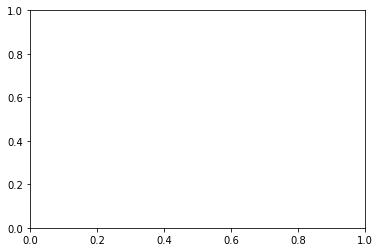

In [249]:
import matplotlib.pyplot as plt
header = [i for i in range(1950,1980)]
df.plot(x = header, y='shortname', kind = 'scatter')
plt.show()